In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

In [2]:
repo_root = '/global/homes/m/{}/desi/BGS/Sam/DESI/'.format(os.environ['USER'])

sys.path.append(repo_root)

In [3]:
from   astropy.table import Table
from   cosmo         import cosmo, fsky

In [4]:
field = 'G9'
realz = 0

In [5]:
# Parameters
field = "G12"


In [6]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_{}_{}.fits'.format(field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.579023961),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763)])

In [7]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_bd_{}_{}.fits'.format(field, realz)

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.3),
             ('DZ', 0.0001),
             ('NRAND', 1840387),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 3680772.579023961),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763)])

In [8]:
os.environ['CSCRATCH'] + '/desi/BGS/Sam/'

'/global/cscratch1/sd/mjwilson/desi/BGS/Sam/'

In [9]:
! ls '/global/cscratch1/sd/mjwilson/desi/BGS/Sam/'

randoms_G12_0.fits     randoms_N8_G15_0.fits  randoms_bd_G9_0.fits
randoms_G15_0.fits     randoms_N8_G9_0.fits   randoms_bd_ddp_n8_G12_0.fits
randoms_G9_0.fits      randoms_bd_G12_0.fits  randoms_bd_ddp_n8_G15_0.fits
randoms_N8_G12_0.fits  randoms_bd_G15_0.fits  randoms_bd_ddp_n8_G9_0.fits


In [10]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,bytes3,float32,float32,float32,int64,int32,float64,int64
179.1185,-1.8082728,0.16447665,662216.5,541755,G12,477.06158,-7.305723,-10.886431,0,1091,9.779896407957047,673717
177.94556,-1.0725325,0.24517545,2083088.2,361174,G12,698.78125,-25.015764,-6.976165,0,1103,23.043320919545863,1417240
175.98367,1.590196,0.24835752,2160763.8,1548212,G12,705.64355,-49.510822,25.81727,0,1023,4.673459009180154,456462
178.66829,-0.7048931,0.23967364,1952958.9,827053,G12,684.20056,-15.857448,-2.4342554,0,1102,26.844723537821068,1111677
177.48915,0.9617022,0.28249404,3109246.2,220389,G12,798.1159,-34.949528,20.395632,0,1109,14.044993733914117,1563580
178.17665,1.6011235,0.17796256,831746.6,575370,G12,514.3088,-16.341948,18.887308,0,905,3.225306024264656,1362459
180.21371,0.9632578,0.2526735,2268975.8,1759399,G12,719.23364,2.7325554,18.387875,0,1069,12.584806881535373,221050
175.43771,-0.99565506,0.29590198,3541642.0,503513,G12,831.9198,-66.318474,-7.224884,0,1120,8.095951466137329,1480551
184.14728,0.42879975,0.23779581,1909742.6,995689,G12,677.4312,49.172585,11.010491,0,1066,18.23287445161839,1401433


In [11]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_bd_ddp_n8_{}_{}.fits'.format(field, realz)

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.6),
             ('DZ', 0.0001),
             ('NRAND', 2389276),
             ('NRAND8', 1072.33029242)])

(-3.0, 4.0)

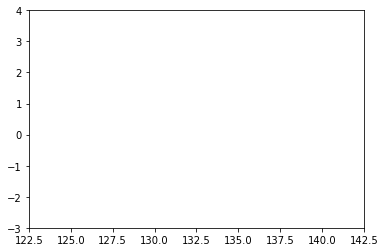

In [12]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

pl.xlim(122.5, 142.5)
pl.ylim(-3., 4.)

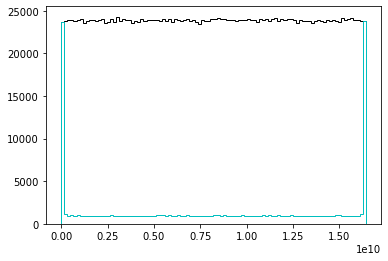

In [13]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

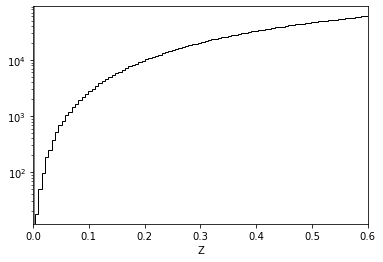

In [14]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

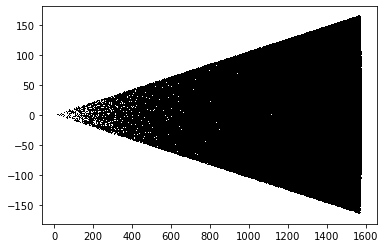

In [15]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

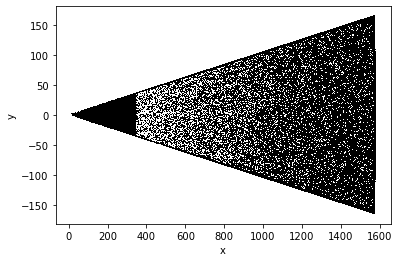

In [16]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1000.0)

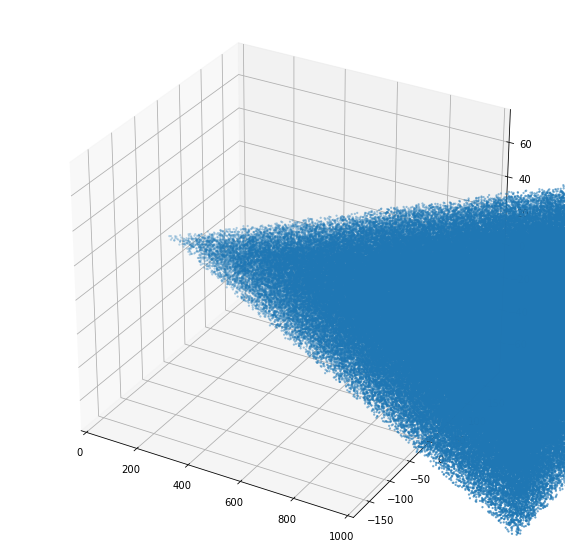

In [17]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

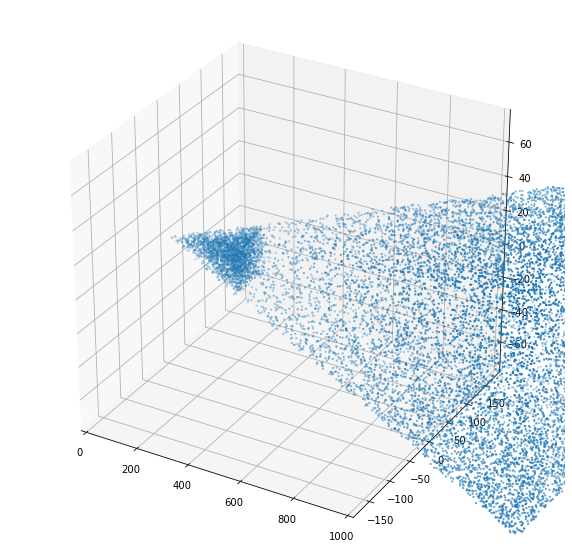

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [19]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000100448838894

In [20]:
np.mean(rand['IS_BOUNDARY'].data)

0.05878391613191611

In [21]:
rand['N8'].data.min(), rand['N8'].data.max()

(7, 294)

(50.0, 1500.0)

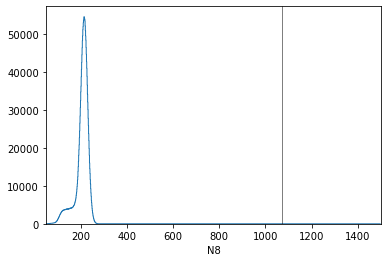

In [22]:
_ = pl.hist(rand['N8'], bins=np.arange(0, 1500, 1), histtype='step')
pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)
pl.xlabel('N8')
pl.xlim(50., 1500.)

In [23]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

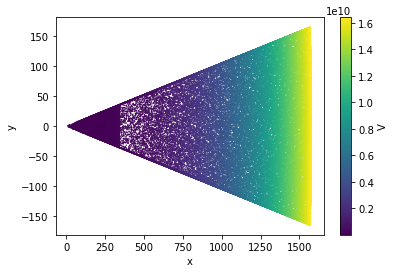

In [24]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

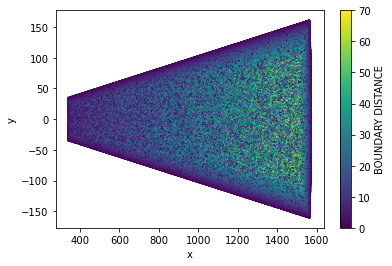

In [25]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='BOUNDARY DISTANCE')

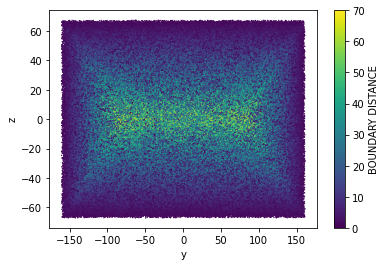

In [26]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_Y'][isin], rand['CARTESIAN_Z'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('y')
pl.ylabel('z')
pl.colorbar(label='BOUNDARY DISTANCE')

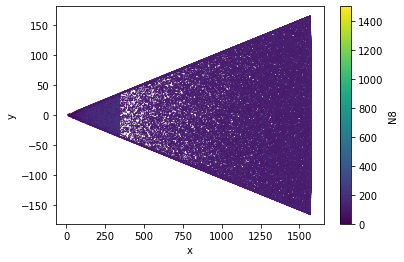

In [27]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

(0.2, 1.2)

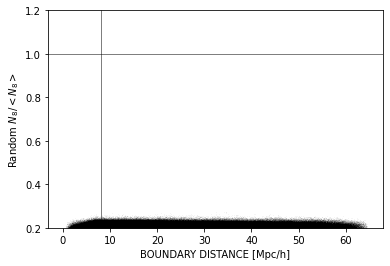

In [28]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['N8'][isin] / rand.meta['NRAND8'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8 / <N_8>$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

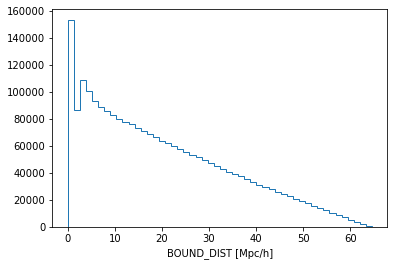

In [29]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

In [30]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,BOUND_DIST,BOUND_ID,DDP1_N8,DDP2_N8,DDP3_N8,FILLFACTOR,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8,DDP1_DELTA8_TIER
float32,float32,float32,float32,int64,bytes3,float32,float32,float32,int64,int32,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64
183.2987,-0.6464083,0.43702155,7124808700.0,452117,G12,1191.7125,68.77254,-3.021774,0,225,48.19781949458753,85991,0,0,0,0.20982341130383192,-1.0,-1.0,-1.0,-99
182.32062,-0.9156936,0.411973,6073262000.0,1982322,G12,1130.8601,45.908234,-8.176214,0,190,40.36393411394156,1842622,0,0,0,0.1771842139899025,-1.0,-1.0,-1.0,-99
185.71732,1.7444237,0.5414768,12590320000.0,1462797,G12,1434.8696,143.81017,56.51048,0,201,4.9635565619941096,2019648,0,0,0,0.18744224743142318,-1.0,-1.0,-1.0,-99
180.78448,1.6972063,0.48834112,9589968000.0,1886719,G12,1316.8864,18.13618,50.579742,0,220,5.913045316638788,2082806,0,0,0,0.20516066883041342,-1.0,-1.0,-1.0,-99
174.98842,-1.8526533,0.35478935,4034267600.0,442038,G12,983.50806,-86.15027,-23.307222,0,190,15.521692935298551,1405362,0,0,0,0.1771842139899025,-1.0,-1.0,-1.0,-99
174.25935,0.1861795,0.30002475,2531297500.0,790239,G12,841.14954,-84.502396,10.120251,0,162,3.1932620772583653,2263888,0,0,0,0.15107285613875898,-1.0,-1.0,-1.0,-99
183.7036,-0.9048898,0.27750438,2033172700.0,658855,G12,784.22595,50.817238,-5.5377917,0,203,28.46424882934553,2300937,0,0,0,0.18930734442079056,-1.0,-1.0,-1.0,-99
180.4981,1.9761218,0.42815354,6741280000.0,597728,G12,1170.7427,10.269668,50.673523,1,122,0.0,0,0,0,0,0.11377091635141108,-1.0,-1.0,-1.0,-99
178.99557,-1.0808998,0.47649142,8983280000.0,621069,G12,1289.3192,-22.504715,-13.026513,0,235,42.24392700987831,101842,0,0,0,0.21914889625066888,-1.0,-1.0,-1.0,-99


In [31]:
rand.meta

OrderedDict([('ZMIN', 0.0),
             ('ZMAX', 0.6),
             ('DZ', 0.0001),
             ('NRAND', 2389276),
             ('NRAND8', 1072.33029242)])

In [32]:
gold = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_ddp_n8.fits')
gold.meta

OrderedDict([('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2483299970626831),
             ('DDP1_VZ', 6451530.309761727),
             ('DDP1_NGAL', 34732),
             ('DDP1_DENS', 0.005383528919866882),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1830800026655197),
             ('DDP2_VZ', 2679079.755786841),
             ('DDP2_NGAL', 26598),
             ('DDP2_DENS', 0.009928035902084674),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.09973999857902527),
             ('DDP3_VZ', 432372.2344703941),
             ('DDP3_NGAL', 7954),
             ('DDP3_DENS', 0.01839618589233124),
             ('VOL8', 2144.660584850632)])

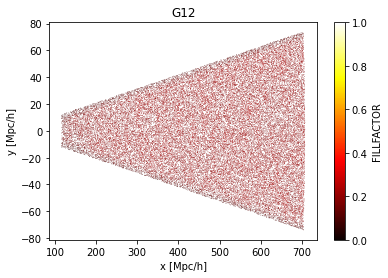

In [33]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

# TODO: Get from randoms header when available. 
ddp_zmin = gold.meta['DDP1_ZMIN']
ddp_zmax = gold.meta['DDP1_ZMAX']
        
isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
randoms_slice = randoms_slice_nolimits[isin]
    
plt.scatter(randoms_slice['CARTESIAN_X'],\
            randoms_slice['CARTESIAN_Y'],\
            c=randoms_slice['FILLFACTOR'],\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('x [Mpc/h]')
pl.ylabel('y [Mpc/h]')

pl.colorbar(label='FILLFACTOR')
    
# pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
# pl.ylim(-80., 80.)
    
plt.title('{}'.format(field))
plt.show()

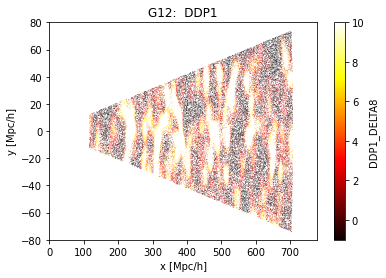

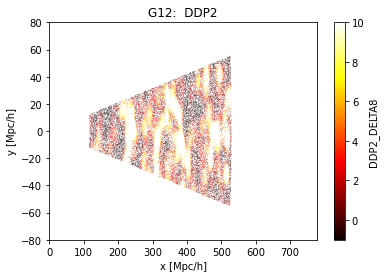

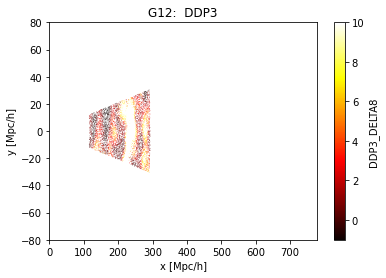

In [34]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='hot')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8'.format(idx))
    
    pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [35]:
cmap = plt.cm.tab20c  # define the colormap

# extract all colors from the .jet map

cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 4, 5)
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

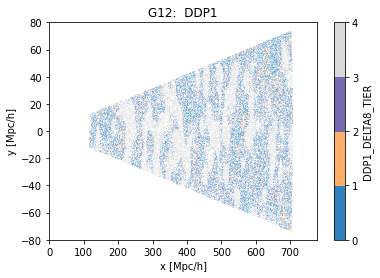

In [36]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 2, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8_TIER'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=4.,\
                cmap=cmap,\
                norm=norm)

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8_TIER'.format(idx))
    
    pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

Text(0, 0.5, 'DDP2_DELTA8')

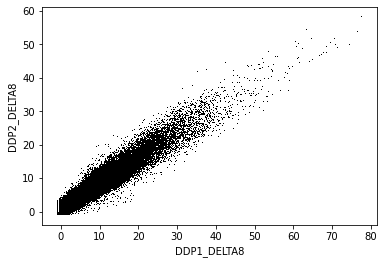

In [37]:
# Larger minimum redshift. 
ddp1_zmin = gold.meta['DDP1_ZMIN']

# Smaller maximum redshift. 
ddp3_zmax = gold.meta['DDP2_ZMAX']
            
isin = (rand['Z'] > ddp1_zmin) & (rand['Z'] < ddp3_zmax)

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlabel('DDP1_DELTA8')
pl.ylabel('DDP2_DELTA8')

# Done.